<a href="https://colab.research.google.com/github/lucapap97/TurkishLira/blob/master/TurkishLira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN for Turkish Lira Recognition

## Setup and dataset download throught Kaggle API

In [ ]:
!pip install kaggle

For dowload the dataset we must log-in with the [Kaggle account](https://www.kaggle.com/account/login?phase=startSignInTab&returnUrl=%2Flucapapparotto%2Faccount) and download the Kaggle Token as a json file called *kaggle.json*.

After that we need to upload the JSON file in Google Colaboratory:

In [ ]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lucapapparotto","key":"fed1199489a6036c0262dc659a7a61cb"}'}

In [ ]:
!ls
!mkdir ~/.kaggle
!chmod 600 kaggle.json
!cp kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

kaggle.json  sample_data
- path is now set to: {/content}


Now we are able to dowload the dataset throught the Kaggle API:

In [ ]:
!kaggle datasets download -d baltacifatih/turkish-lira-banknote-dataset -p /content

100% 3.50G/3.50G [01:54<00:00, 29.8MB/s]



Let's create a new directory called *dataset* and unzip there the new downloaded file

In [ ]:
!ls

kaggle.json  sample_data  turkish-lira-banknote-dataset.zip


In [ ]:
!mkdir -p dataset/downloaded
!unzip -q turkish-lira-banknote-dataset.zip -d ./dataset/downloaded
!rm turkish-lira-banknote-dataset.zip
!rm kaggle.json

In [ ]:
!ls -lah dataset/downloaded

total 408K
drwxr-xr-x 8 root root 4.0K Aug 16 07:52 .
drwxr-xr-x 3 root root 4.0K Aug 16 07:51 ..
drwxr-xr-x 2 root root  52K Aug 16 07:51 10
drwxr-xr-x 2 root root  40K Aug 16 07:51 100
drwxr-xr-x 2 root root  40K Aug 16 07:51 20
drwxr-xr-x 2 root root  44K Aug 16 07:51 200
drwxr-xr-x 2 root root  40K Aug 16 07:51 5
drwxr-xr-x 2 root root  40K Aug 16 07:52 50
-rw-r--r-- 1 root root 129K Apr 19 14:57 train.txt
-rw-r--r-- 1 root root  11K Apr 19 14:57 validation.txt


As we can see the images are organized in directory named by *category*, by intuition we can say that the labels of the images are the names of the directory.

The 2 files *train.txt* and *validation.txt* tell us how to split the images for the training dataset and the validation dataset.

Now move the two text file in another directory, just fo better organization.

In [ ]:
!mkdir dataset/txtFiles
!mv dataset/downloaded/train.txt dataset/txtFiles
!mv dataset/downloaded/validation.txt dataset/txtFiles

!ls -lah dataset/txtFiles

total 152K
drwxr-xr-x 2 root root 4.0K Aug 16 07:53 .
drwxr-xr-x 4 root root 4.0K Aug 16 07:53 ..
-rw-r--r-- 1 root root 129K Apr 19 14:57 train.txt
-rw-r--r-- 1 root root  11K Apr 19 14:57 validation.txt


As we have seen before, the labels of the images are the name of the directory.

For example:


*   10
  *   10_1_0001.jpg
  *   10_1_0002.jpg
  *   10_1_0002.jpg

so all of these 3 images are referring to the bancknote value of 10.

Same for the others directory.

Searching throught the Keras API I've found the method [*tf.keras.preprocessing.image_dataset_from_directory(directory, labels='inferred')*](https://keras.io/api/preprocessing/image/) that according to the method description returns a tf.data.Dataset that yields a tuple (images, labels), where images has shape (batch_size, image_size[0], image_size[1], num_channels).

So now we need to split the pictures in 2 dataset: training and validation.

First of all we need two new directory trees:


In [ ]:
!mkdir -p dataset/train_set/{\10,100,20,200,5,50}
!mkdir -p dataset/valid_set/{\10,100,20,200,5,50}

!ls -lah dataset/train_set
!ls -lah dataset/valid_set

total 32K
drwxr-xr-x 8 root root 4.0K Aug 16 07:53 .
drwxr-xr-x 6 root root 4.0K Aug 16 07:53 ..
drwxr-xr-x 2 root root 4.0K Aug 16 07:53 10
drwxr-xr-x 2 root root 4.0K Aug 16 07:53 100
drwxr-xr-x 2 root root 4.0K Aug 16 07:53 20
drwxr-xr-x 2 root root 4.0K Aug 16 07:53 200
drwxr-xr-x 2 root root 4.0K Aug 16 07:53 5
drwxr-xr-x 2 root root 4.0K Aug 16 07:53 50
total 32K
drwxr-xr-x 8 root root 4.0K Aug 16 07:53 .
drwxr-xr-x 6 root root 4.0K Aug 16 07:53 ..
drwxr-xr-x 2 root root 4.0K Aug 16 07:53 10
drwxr-xr-x 2 root root 4.0K Aug 16 07:53 100
drwxr-xr-x 2 root root 4.0K Aug 16 07:53 20
drwxr-xr-x 2 root root 4.0K Aug 16 07:53 200
drwxr-xr-x 2 root root 4.0K Aug 16 07:53 5
drwxr-xr-x 2 root root 4.0K Aug 16 07:53 50


So now we can rename(move) all the pictures in the correct directory according to the paths in the files:

In [ ]:
import os

train_file = "dataset/txtFiles/train.txt"

from_path_train = "dataset/downloaded/"
to_path_train = "dataset/train_set/"


with open(train_file, "r") as file1:
    for line in file1:
      os.rename(from_path_train + line[:-1] , to_path_train + line[:-1])
        

In [ ]:
!ls dataset/train_set/10 | wc -l

925


In [ ]:
validation_file = "dataset/txtFiles/validation.txt"

from_path_valid = "dataset/downloaded/"
to_path_valid = "dataset/valid_set/"

with open(validation_file, "r") as file1:
    for line in file1:
      os.rename(from_path_valid + line[:-1] , to_path_valid + line[:-1])

In [ ]:
!ls dataset/valid_set/10 | wc -l
!ls dataset/valid_set/10 | head -4

75
10_1_0009.png
10_1_0015.png
10_1_0027.png
10_1_0031.png


In [ ]:
print("old directory:")
!ls dataset/downloaded/10 | wc -l
!ls dataset/downloaded/100 | wc -l
!ls dataset/downloaded/20 | wc -l
!ls dataset/downloaded/200 | wc -l
!ls dataset/downloaded/5 | wc -l
!ls dataset/downloaded/50 | wc -l

print("training set:")
!ls dataset/train_set/10 | wc -l
!ls dataset/train_set/100 | wc -l
!ls dataset/train_set/20 | wc -l
!ls dataset/train_set/200 | wc -l
!ls dataset/train_set/5 | wc -l
!ls dataset/train_set/50 | wc -l

print("training set:")
!ls dataset/valid_set/10 | wc -l
!ls dataset/valid_set/100 | wc -l
!ls dataset/valid_set/20 | wc -l
!ls dataset/valid_set/200 | wc -l
!ls dataset/valid_set/5 | wc -l
!ls dataset/valid_set/50 | wc -l



old directory:
0
0
0
0
0
0
training set:
925
925
925
925
925
925
training set:
75
75
75
75
75
75


According to kaggle specification of this dataset we have correctly splitted the given dataset in the two dataset needed.

In [ ]:
!rm -rf dataset/downloaded
!ls dataset/
!ls

train_set  txtFiles  valid_set
dataset  sample_data


Let's create the two dataset!

In [ ]:
import tensorflow as tf

AUTO = tf.data.experimental.AUTOTUNE

num_classes = 6
img_width = 64
img_height = img_width * 9//16
BATCH_SIZE = 32
EPOCHS = 10

def get_training_dataset():
  train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      to_path_train,
      labels="inferred",
      label_mode="categorical",
      image_size = (img_height, img_width),
      color_mode="rgb",
      batch_size=BATCH_SIZE,
      shuffle=True,
      seed=None,
      validation_split=None,
      subset=None,
      follow_links=False,
  )
    
  return train_ds

def get_validation_dataset():
  validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
      to_path_valid,
      labels="inferred",
      label_mode="categorical",
      image_size = (img_height, img_width),
      color_mode="rgb",
      batch_size=450,
      shuffle=None,
      seed=None,
      validation_split=None,
      subset=None,
      follow_links=False,
  )
  validation_dataset = validation_dataset.repeat()
  return validation_dataset

train_dataset = get_training_dataset()
validation_dataset = get_validation_dataset()


Found 5550 files belonging to 6 classes.
Found 450 files belonging to 6 classes.


Print some pictures:

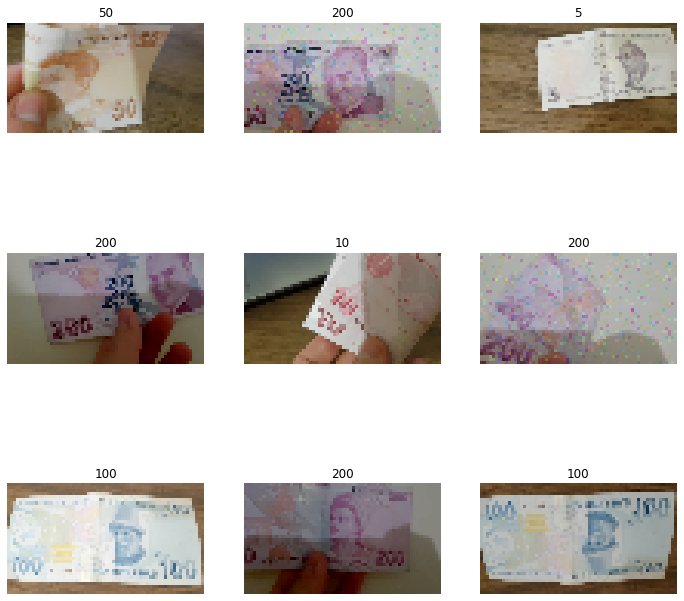

In [ ]:
import matplotlib.pyplot as plt

class_names = train_dataset.class_names

plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i].numpy().tolist().index(1.)])
    plt.axis("off")



In [ ]:
train_dataset = train_dataset.repeat().prefetch(AUTO)

In [ ]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 36, 64, 3)
(32, 6)


In [ ]:
from IPython.display import display, clear_output
import numpy as np

class PlotTraining(tf.keras.callbacks.Callback):
  def __init__(self, sample_rate=1, zoom=1):
    self.sample_rate = sample_rate
    self.step = 0
    self.zoom = zoom
    self.steps_per_epoch = 60000//BATCH_SIZE

  def on_train_begin(self, logs={}):
    self.batch_history = {}
    self.batch_step = []
    self.epoch_history = {}
    self.epoch_step = []
    self.fig, self.axes = plt.subplots(1, 2, figsize=(16, 7))
    plt.ioff()

  def on_batch_end(self, batch, logs={}):
    if (batch % self.sample_rate) == 0:
      self.batch_step.append(self.step)
      for k,v in logs.items():
        # do not log "batch" and "size" metrics that do not change
        # do not log training accuracy "acc"
        if k=='batch' or k=='size':# or k=='acc':
          continue
        self.batch_history.setdefault(k, []).append(v)
    self.step += 1

  def on_epoch_end(self, epoch, logs={}):
    plt.close(self.fig)
    self.axes[0].cla()
    self.axes[1].cla()
      
    self.axes[0].set_ylim(0, 1.2/self.zoom)
    self.axes[1].set_ylim(1-1/self.zoom/2, 1+0.1/self.zoom/2)
    
    self.epoch_step.append(self.step)
    for k,v in logs.items():
      # only log validation metrics
      if not k.startswith('val_'):
        continue
      self.epoch_history.setdefault(k, []).append(v)

    clear_output(wait=True)
    
    for k,v in self.batch_history.items():
      (self.axes[0 if k.endswith('loss') else 1]
           .plot(np.array(self.batch_step) / self.steps_per_epoch, v, label=k))
      
    for k,v in self.epoch_history.items():
      (self.axes[0 if k.endswith('loss') else 1]
           .plot(np.array(self.epoch_step) / self.steps_per_epoch, v,
                 label=k, linewidth=3))
      
    self.axes[0].legend()
    self.axes[1].legend()
    self.axes[0].set_xlabel('epochs')
    self.axes[1].set_xlabel('epochs')
    self.axes[0].minorticks_on()
    self.axes[0].grid(True, which='major', axis='both',
                      linestyle='-', linewidth=1)
    self.axes[0].grid(True, which='minor', axis='both',
                      linestyle=':', linewidth=0.5)
    self.axes[1].minorticks_on()
    self.axes[1].grid(True, which='major', axis='both',
                      linestyle='-', linewidth=1)
    self.axes[1].grid(True, which='minor', axis='both',
                      linestyle=':', linewidth=0.5)
    display(self.fig)


In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


In [ ]:
steps_per_epoch = 925*6//BATCH_SIZE
print(steps_per_epoch)

173


In [ ]:
model = tf.keras.Sequential([                             
  data_augmentation,
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  

  tf.keras.layers.Conv2D(kernel_size=3, filters=24, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),


  tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  

  tf.keras.layers.Flatten(),
      
  tf.keras.layers.Dense(200, use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

plot_training = PlotTraining(sample_rate=10, zoom=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 36, 64, 3)         0         
_________________________________________________________________
rescaling (Rescaling)        (None, 36, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 36, 64, 16)        432       
_________________________________________________________________
batch_normalization (BatchNo (None, 36, 64, 16)        48        
_________________________________________________________________
activation (Activation)      (None, 36, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 64, 24)        3456      
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 64, 24)       

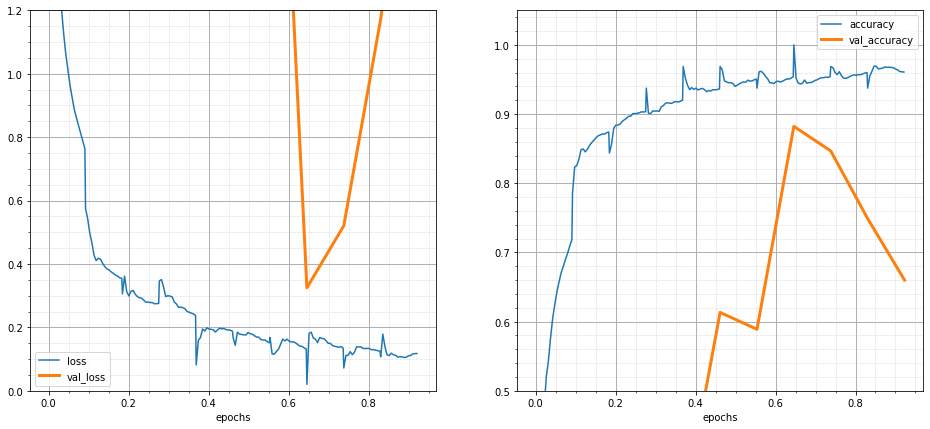

173/173 [==============================] - 108s 627ms/step - loss: 0.1166 - accuracy: 0.9612 - val_loss: 2.0133 - val_accuracy: 0.6600


In [ ]:
history = model.fit(train_dataset,
                    steps_per_epoch=steps_per_epoch,
                    epochs=EPOCHS,
                    validation_data=validation_dataset,
                    validation_steps=1,
                    callbacks = [plot_training])

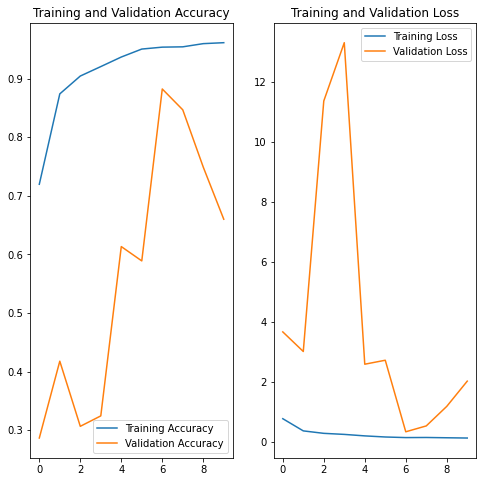

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def plot_learning_rate(lr_func, epochs):
  xx = np.arange(epochs+1, dtype=np.float)
  y = [lr_decay(x) for x in xx]
  fig, ax = plt.subplots(figsize=(9, 6))
  ax.set_xlabel('epochs')
  ax.set_title('Learning rate\ndecays from {:0.3g} to {:0.3g}'.format(y[0],
                                                                      y[-2]))
  ax.minorticks_on()
  ax.grid(True, which='major', axis='both', linestyle='-', linewidth=1)
  ax.grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5)
  ax.step(xx,y, linewidth=3, where='post')
  display(fig)

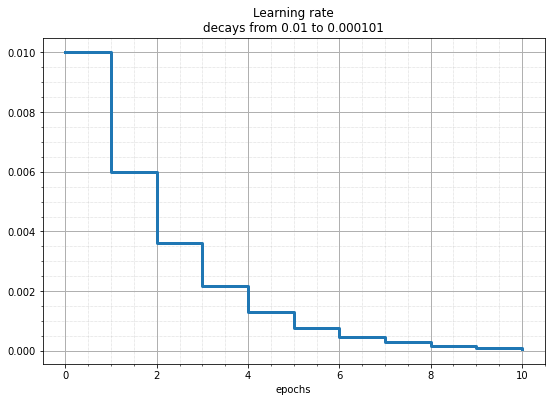

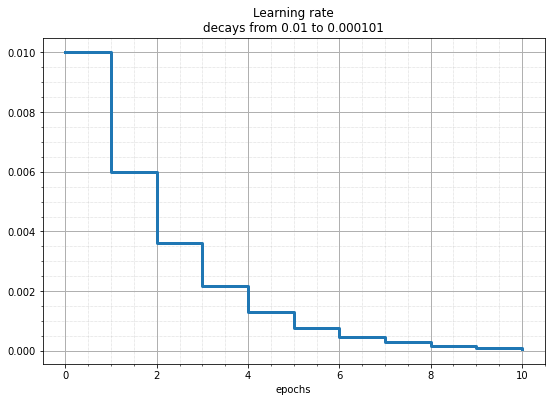

In [ ]:
import math

EPOCHS = 10

def lr_decay(epoch):
  return 0.01 * math.pow(0.6, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

plot_learning_rate(lr_decay, EPOCHS)

In [ ]:
model = tf.keras.Sequential([                             
  data_augmentation,
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Conv2D(kernel_size=3, filters=24, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Flatten(),      
  tf.keras.layers.Dense(200, use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

plot_training = PlotTraining(sample_rate=10, zoom=4)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 36, 64, 3)         0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 36, 64, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 64, 16)        432       
_________________________________________________________________
batch_normalization_4 (Batch (None, 36, 64, 16)        48        
_________________________________________________________________
activation_4 (Activation)    (None, 36, 64, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 36, 64, 24)        3456      
_________________________________________________________________
batch_normalization_5 (Batch (None, 36, 64, 24)       

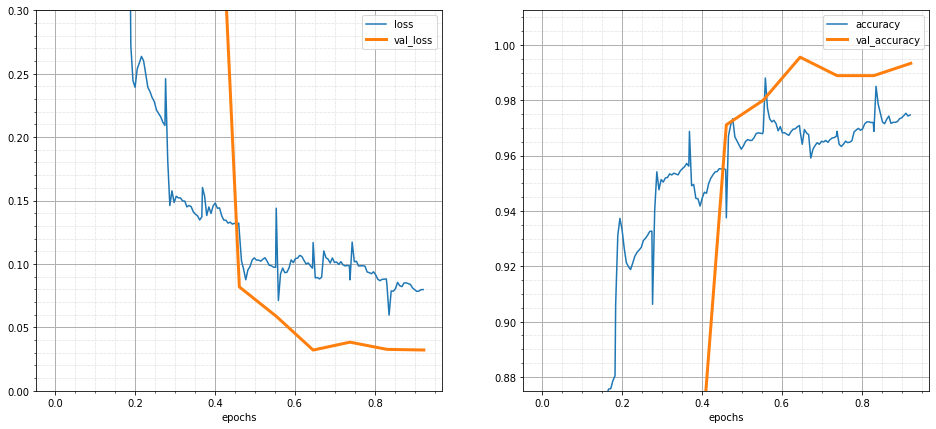

173/173 [==============================] - 107s 618ms/step - loss: 0.0798 - accuracy: 0.9744 - val_loss: 0.0322 - val_accuracy: 0.9933


In [ ]:
history = model.fit(train_dataset,
                    steps_per_epoch=steps_per_epoch,
                    epochs=EPOCHS,
                    validation_data=validation_dataset,
                    validation_steps=1,
                    callbacks=[plot_training, lr_decay_callback])

In [ ]:
#try to resize less maybe we are compressing to much and we are loosing to much information

img_width = 80
img_height = img_width * 9//16
BATCH_SIZE = 64
EPOCHS = 10

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])


#and add some transformation to the image manually.

def get_training_dataset(height,width,batch_size):
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        to_path_train,
        labels="inferred",
        label_mode="categorical",
        image_size = (height, width),
        color_mode="rgb",
        batch_size=batch_size,
        shuffle=True,
        seed=None,
        validation_split=None,
        subset=None,
        follow_links=False,
    )
    train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTO)


    train_ds = train_ds.repeat().prefetch(AUTO)
    return train_ds

def get_validation_dataset(height,width):
  validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
      to_path_valid,
      labels="inferred",
      label_mode="categorical",
      image_size = (height, width),
      color_mode="rgb",
      batch_size=450*3,
      shuffle=None,
      seed=None,
      validation_split=None,
      subset=None,
      follow_links=False,
  )
  validation_dataset = validation_dataset.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTO)
  validation_dataset = validation_dataset.repeat()
  return validation_dataset

train_dataset = get_training_dataset(img_height,img_width, BATCH_SIZE)
validation_dataset = get_validation_dataset(img_height,img_width)

Found 5550 files belonging to 6 classes.
Found 450 files belonging to 6 classes.


In [ ]:
steps_per_epoch = 925*6*3//BATCH_SIZE

In [ ]:
model = tf.keras.Sequential([                             
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Conv2D(kernel_size=3, filters=24, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Flatten(),      
  tf.keras.layers.Dense(200, use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

plot_training = PlotTraining(sample_rate=10, zoom=4)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 45, 80, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 80, 16)        432       
_________________________________________________________________
batch_normalization_8 (Batch (None, 45, 80, 16)        48        
_________________________________________________________________
activation_8 (Activation)    (None, 45, 80, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 45, 80, 24)        3456      
_________________________________________________________________
batch_normalization_9 (Batch (None, 45, 80, 24)        72        
_________________________________________________________________
activation_9 (Activation)    (None, 45, 80, 24)       

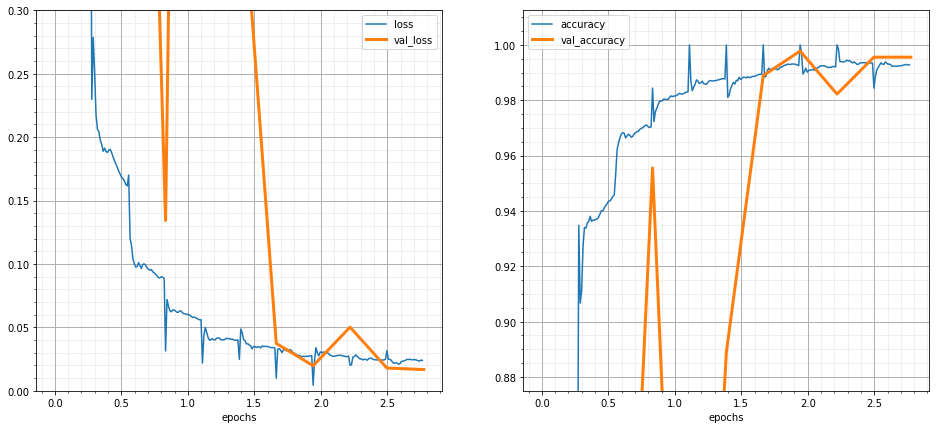

260/260 [==============================] - 316s 1s/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.0167 - val_accuracy: 0.9956


In [ ]:
history = model.fit(train_dataset,
                    steps_per_epoch=steps_per_epoch,
                    epochs=EPOCHS,
                    validation_data=validation_dataset,
                    validation_steps=1,
                    callbacks=[plot_training, lr_decay_callback])

So we reached a decent values:

loss: 0.0212 - accuracy: 0.9943 - val_loss: 0.0127 - val_accuracy: 0.9956

But it tooks a lot of time, 5min each epoch

So let's try to go faster


In [ ]:

model1 = tf.keras.Sequential([                             
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(),


  tf.keras.layers.Conv2D(kernel_size=6, filters=24, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),      
  tf.keras.layers.Dense(200, use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Dense(60, use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(6, activation='softmax')
])

model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

plot_training = PlotTraining(sample_rate=10, zoom=6)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 45, 80, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 45, 80, 16)        432       
_________________________________________________________________
batch_normalization_12 (Batc (None, 45, 80, 16)        48        
_________________________________________________________________
activation_12 (Activation)   (None, 45, 80, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 40, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 40, 24)        13824     
_________________________________________________________________
batch_normalization_13 (Batc (None, 22, 40, 24)       

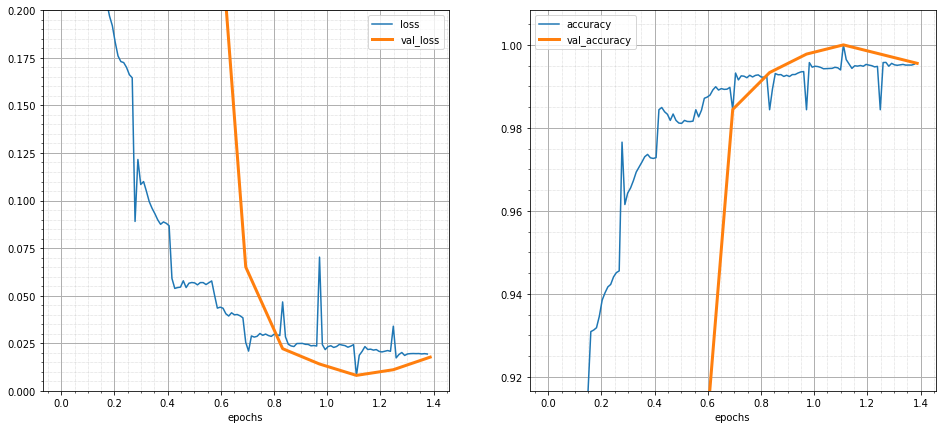

130/130 [==============================] - 310s 2s/step - loss: 0.0196 - accuracy: 0.9954 - val_loss: 0.0177 - val_accuracy: 0.9956


In [ ]:
train_dataset = get_training_dataset(img_height, img_width, 128)

steps_per_epoch = steps_per_epoch = 925*6*3//128

history = model1.fit(train_dataset,
                    steps_per_epoch=steps_per_epoch,
                    epochs=EPOCHS,
                    validation_data=validation_dataset,
                    validation_steps=1,
                    callbacks=[plot_training, lr_decay_callback])

# Some other tests


In [ ]:
model2 = tf.keras.Sequential([                             
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(),


  tf.keras.layers.Conv2D(kernel_size=3, filters=24, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),      
  tf.keras.layers.Dense(200, use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.1),

  tf.keras.layers.Dense(60, use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(6, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

plot_training = PlotTraining(sample_rate=10, zoom=6)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 45, 80, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 80, 16)        432       
_________________________________________________________________
batch_normalization_16 (Batc (None, 45, 80, 16)        48        
_________________________________________________________________
activation_16 (Activation)   (None, 45, 80, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 40, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 40, 24)        3456      
_________________________________________________________________
batch_normalization_17 (Batc (None, 22, 40, 24)       

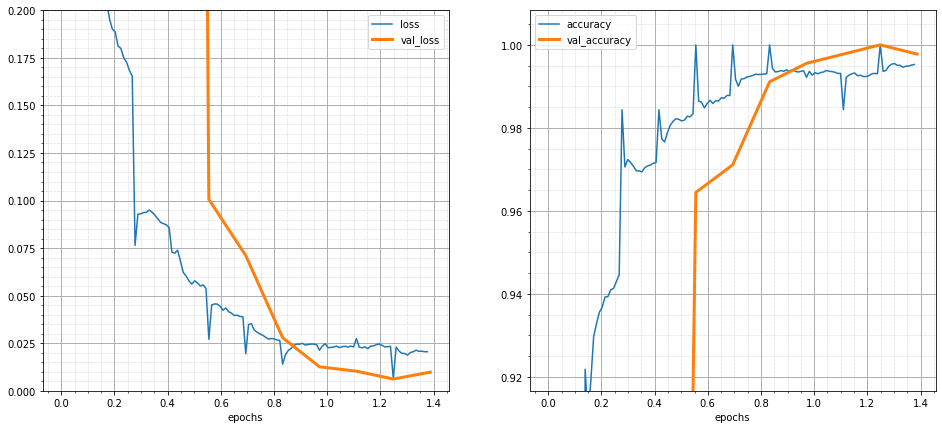

130/130 [==============================] - 352s 3s/step - loss: 0.0207 - accuracy: 0.9951 - val_loss: 0.0098 - val_accuracy: 0.9978


In [ ]:
history2 = model2.fit(train_dataset,
                    steps_per_epoch=steps_per_epoch,
                    epochs=EPOCHS,
                    validation_data=validation_dataset,
                    validation_steps=1,
                    callbacks=[plot_training, lr_decay_callback])

In [ ]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 45, 80, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 80, 16)        432       
_________________________________________________________________
batch_normalization_16 (Batc (None, 45, 80, 16)        48        
_________________________________________________________________
activation_16 (Activation)   (None, 45, 80, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 40, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 40, 24)        3456      
_________________________________________________________________
batch_normalization_17 (Batc (None, 22, 40, 24)       

Data augmentation is really usefull?

In [ ]:
def get_training_dataset(height,width,batch_size, resize):
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        to_path_train,
        labels="inferred",
        label_mode="categorical",
        image_size = (height, width),
        color_mode="rgb",
        batch_size=batch_size,
        shuffle=True,
        seed=None,
        validation_split=None,
        subset=None,
        follow_links=False,
    )
    if(resize):
      train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                  num_parallel_calls=AUTO)


    train_ds = train_ds.repeat().prefetch(AUTO)
    return train_ds

train_dataset = get_training_dataset(img_height, img_width, 128, resize = False)

steps_per_epoch = steps_per_epoch = 925*6//128

model3 = tf.keras.Sequential([                
                                          
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  tf.keras.layers.Conv2D(kernel_size=6, filters=16, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.AveragePooling2D(),

  tf.keras.layers.Conv2D(kernel_size=6, filters=32,
                             use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

  tf.keras.layers.Flatten(),      
  tf.keras.layers.Dense(250, use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.1),
  
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(6, activation='softmax')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

plot_training = PlotTraining(sample_rate=10, zoom=6)

Found 5550 files belonging to 6 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 45, 80, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 45, 80, 16)        1728      
_________________________________________________________________
batch_normalization (BatchNo (None, 45, 80, 16)        48        
_________________________________________________________________
activation (Activation)      (None, 45, 80, 16)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 22, 40, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 20, 32)        18432     
_________________________________________________________________
batch_normali

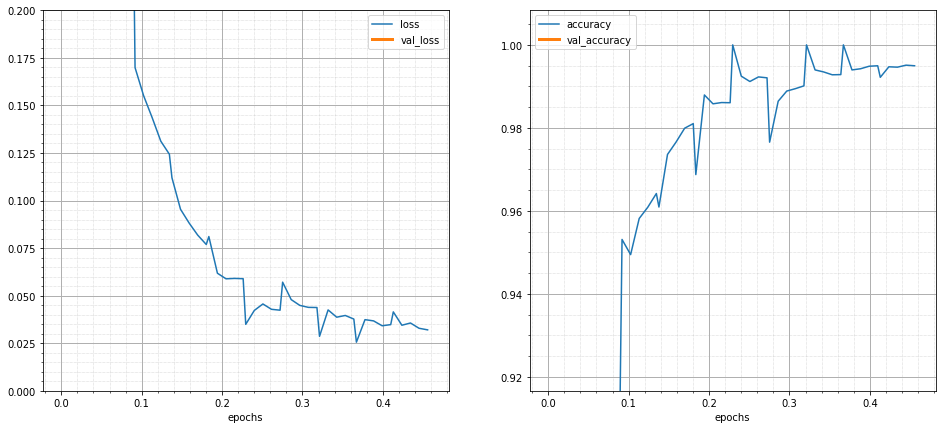

43/43 [==============================] - 116s 3s/step - loss: 0.0319 - accuracy: 0.9952 - val_loss: 0.9491 - val_accuracy: 0.7556


In [ ]:
history3 = model3.fit(train_dataset,
                    steps_per_epoch=steps_per_epoch,
                    epochs=EPOCHS,
                    validation_data=validation_dataset,
                    validation_steps=1,
                    callbacks=[plot_training, lr_decay_callback])

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model3 = tf.keras.Sequential([
  data_augmentation, 
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  tf.keras.layers.Conv2D(kernel_size=6, filters=16, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.AveragePooling2D(),

  tf.keras.layers.Conv2D(kernel_size=6, filters=32,
                             use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

  tf.keras.layers.Flatten(),      
  tf.keras.layers.Dense(250, use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.1),
  
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(6, activation='softmax')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

plot_training = PlotTraining(sample_rate=10, zoom=6)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 45, 80, 3)         0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 45, 80, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 80, 16)        1728      
_________________________________________________________________
batch_normalization_3 (Batch (None, 45, 80, 16)        48        
_________________________________________________________________
activation_3 (Activation)    (None, 45, 80, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 22, 40, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 20, 32)       

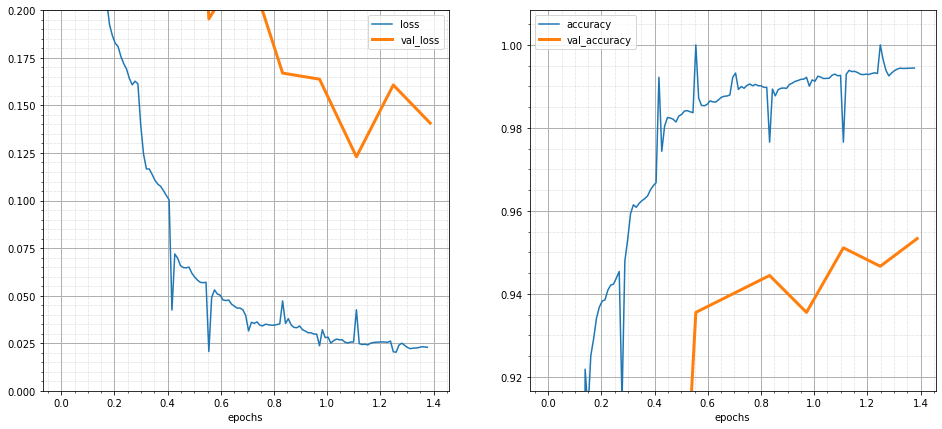

130/130 [==============================] - 335s 3s/step - loss: 0.0227 - accuracy: 0.9945 - val_loss: 0.1407 - val_accuracy: 0.9533


In [ ]:
train_dataset = get_training_dataset(img_height, img_width, 128, resize = False)
steps_per_epoch = steps_per_epoch = 925*6*3//128

history4 = model3.fit(train_dataset,
                    steps_per_epoch=steps_per_epoch,
                    epochs=EPOCHS,
                    validation_data=validation_dataset,
                    validation_steps=1,
                    callbacks=[plot_training, lr_decay_callback])

# Let's go back to the previous model

In [ ]:
train_dataset = get_training_dataset(img_height, img_width, 128, False)
steps_per_epoch = steps_per_epoch = 925*6*3//128


Found 5550 files belonging to 6 classes.


Is batch normalization really usefull or is only a adding computational cost?

In [ ]:
model5 = tf.keras.Sequential([
  
  data_augmentation,
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same'),
  tf.keras.layers.Activation('relu'),


  tf.keras.layers.Conv2D(kernel_size=6, filters=24, padding='same'),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Flatten(),      
  tf.keras.layers.Dense(200),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Dense(60),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Dense(6, activation='softmax')
])

model5.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model5.summary()

plot_training = PlotTraining(sample_rate=10, zoom=5)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 45, 80, 3)         0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 45, 80, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 80, 16)        448       
_________________________________________________________________
activation_6 (Activation)    (None, 45, 80, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 80, 24)        13848     
_________________________________________________________________
activation_7 (Activation)    (None, 45, 80, 24)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 86400)            

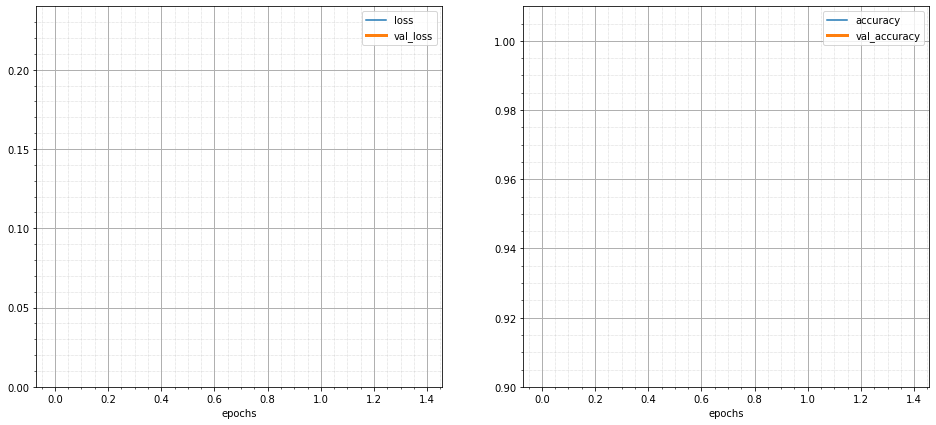

130/130 [==============================] - 329s 3s/step - loss: 1.7918 - accuracy: 0.1662 - val_loss: 1.7918 - val_accuracy: 0.1667


In [ ]:
history5 = model5.fit(train_dataset,
                    steps_per_epoch=steps_per_epoch,
                    epochs=EPOCHS,
                    validation_data=validation_dataset,
                    validation_steps=1,
                    callbacks=[plot_training, lr_decay_callback])

As expected batch normalization make a huge improvement on our network.

But how much dropout performs?

In [ ]:
model5 = tf.keras.Sequential([               
  data_augmentation,              
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),


  tf.keras.layers.Conv2D(kernel_size=6, filters=24, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Flatten(),      
  tf.keras.layers.Dense(200, use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Dense(60, use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  
  tf.keras.layers.Dense(6, activation='softmax')
])

model5.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model5.summary()

plot_training = PlotTraining(sample_rate=10, zoom=8)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 45, 80, 3)         0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 45, 80, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 80, 16)        432       
_________________________________________________________________
batch_normalization_6 (Batch (None, 45, 80, 16)        48        
_________________________________________________________________
activation_10 (Activation)   (None, 45, 80, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 45, 80, 24)        13824     
_________________________________________________________________
batch_normalization_7 (Batch (None, 45, 80, 24)       

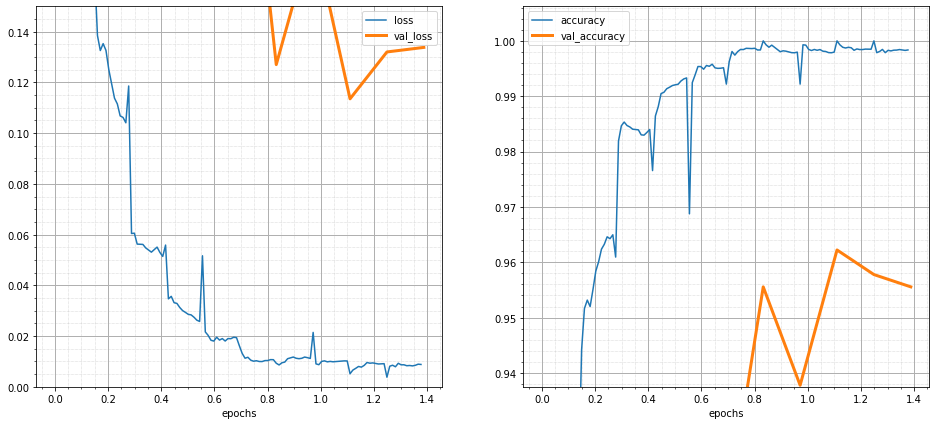

130/130 [==============================] - 338s 3s/step - loss: 0.0088 - accuracy: 0.9984 - val_loss: 0.1338 - val_accuracy: 0.9556


In [ ]:
history5 = model5.fit(train_dataset,
                    steps_per_epoch=steps_per_epoch,
                    epochs=EPOCHS,
                    validation_data=validation_dataset,
                    validation_steps=1,
                    callbacks=[plot_training, lr_decay_callback])

In [ ]:
plot_training = PlotTraining(sample_rate=10, zoom=10)

In [ ]:
model5 = tf.keras.Sequential([             
  data_augmentation,                
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(),


  tf.keras.layers.Conv2D(kernel_size=6, filters=24, padding='same', use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),      
  tf.keras.layers.Dense(200, use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Dense(60, use_bias=False),
  tf.keras.layers.BatchNormalization(center=True, scale=False),
  tf.keras.layers.Activation('relu'),
  
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(6, activation='softmax')
])

model5.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model5.summary()

plot_training = PlotTraining(sample_rate=10, zoom=10)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 45, 80, 3)         0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 45, 80, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 80, 16)        432       
_________________________________________________________________
batch_normalization_10 (Batc (None, 45, 80, 16)        48        
_________________________________________________________________
activation_14 (Activation)   (None, 45, 80, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 40, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 40, 24)       

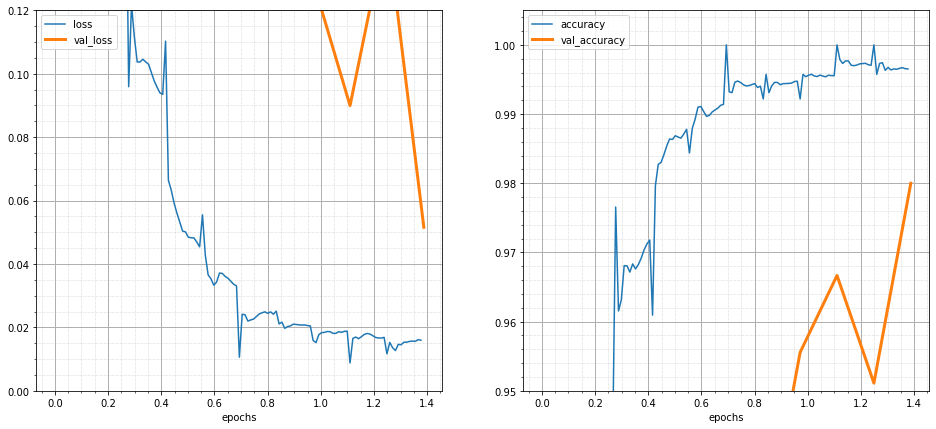

130/130 [==============================] - 333s 3s/step - loss: 0.0158 - accuracy: 0.9965 - val_loss: 0.0516 - val_accuracy: 0.9800


In [ ]:
history5 = model5.fit(train_dataset,
                    steps_per_epoch=steps_per_epoch,
                    epochs=EPOCHS,
                    validation_data=validation_dataset,
                    validation_steps=1,
                    callbacks=[plot_training, lr_decay_callback])